### Differential Equation

$\frac{\mathrm{d}\Psi_1}{\mathrm{d}x} = 4x,$

$\frac{\mathrm{d}\Psi_2}{\mathrm{d}x} = 2x,$

$\Psi_1(0) = 0, \Psi_2(0) = 0, x \in [0, 2]$

In [1]:
from typing import List, Callable
import autograd.numpy as np

from core.neural_network import init_weights, forward
from core.optimizers import gradient_descent, adam
from core.activation_functions import elu, sigmoid, tanh, arctan
from core.plotting_tools import plot_ode, plot_system_ode

In [2]:
PSI_0 = np.array([0, 0])


def derivative(x, psi) -> np.ndarray:
    """Example #4 derivative.
    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_1_dot = 4 * x
    psi_2_dot = 2 * x
    return np.array([psi_1_dot, psi_2_dot])


def analytical_solution(x):
    """Analytical solution to example #4.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    psi_1 = 2 * x**2
    psi_2 = x**2

    return np.array([psi_1, psi_2])


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([PSI_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

Iteration:  0
 1.340527511037536
Iteration:  1
 1.2919785367776193
Iteration:  2
 1.2452792568279059
Iteration:  3
 1.2007009534867061
Iteration:  4
 1.1585200381650302
Iteration:  5
 1.1190105706690994
Iteration:  6
 1.0824328268748338
Iteration:  7
 1.0490034825424868
Iteration:  8
 1.0188534011241959
Iteration:  9
 0.9919801391307136
Iteration:  10
 0.9682079100396489
Iteration:  11
 0.9471739099647243
Iteration:  12
 0.9283549181309368
Iteration:  13
 0.9111339071486979
Iteration:  14
 0.8948866626507321
Iteration:  15
 0.8790573628595264
Iteration:  16
 0.8632025912386783
Iteration:  17
 0.8470030244953204
Iteration:  18
 0.8302539184314434
Iteration:  19
 0.8128463342369745
Iteration:  20
 0.7947467344210118
Iteration:  21
 0.7759782950949329
Iteration:  22
 0.7566047386279531
Iteration:  23
 0.7367165114868756
Iteration:  24
 0.7164191852458491
Iteration:  25
 0.6958244438312947
Iteration:  26
 0.6750439012850205
Iteration:  27
 0.6541848580994191
Iteration:  28
 0.6333465772616

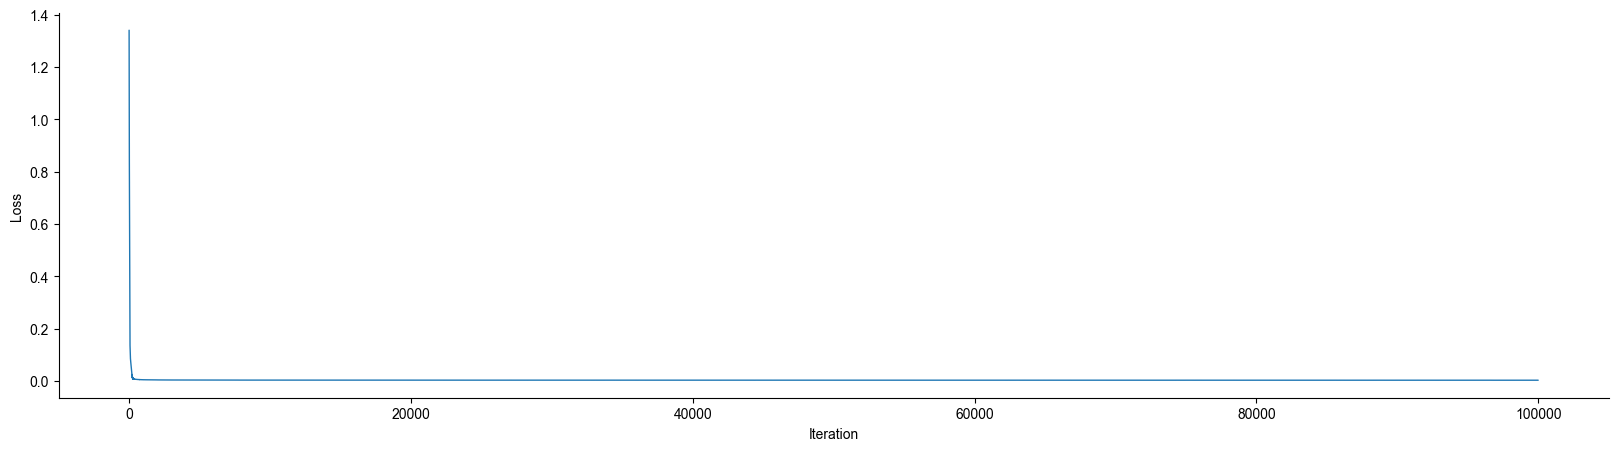

In [3]:
def train():
    t = np.arange(0, 2, 0.2)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights_1 = init_weights(1, hidden_sizes, 1)
    nn_weights_2 = init_weights(1, hidden_sizes, 1)
    adam(
        t,
        [nn_weights_1, nn_weights_2],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=100000,
        step_size=0.01,
        threshold=0.001,
    )

    return [nn_weights_1, nn_weights_2], activation_fns


weights_list, activation_fns = train()

### Evaluating Results

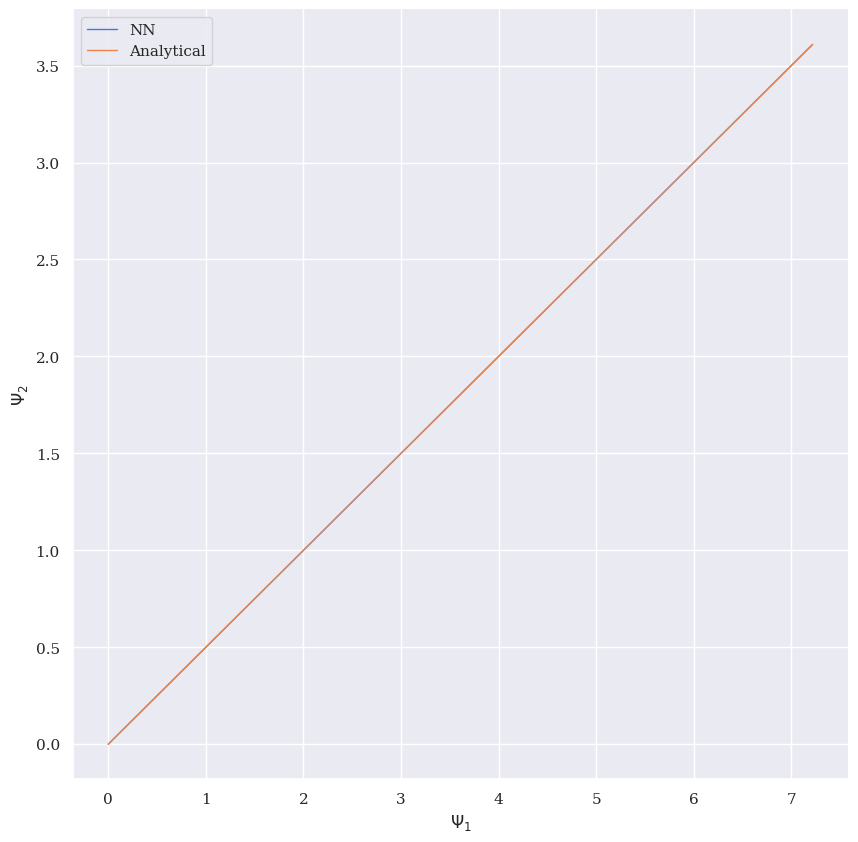

In [5]:
t = np.arange(0, 2, 0.1)
res = trial_solution(t, weights_list, activation_fns)
an_sol = analytical_solution(t)

plot_system_ode(res, an_sol)